In [1]:
import pandas  as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import jovian
import os
import glob
import warnings
warnings.filterwarnings('ignore')
import opendatasets as od 
from pathlib import Path
sns.set_style('darkgrid')

In [2]:
project = 'eda_stack_over_dataset'
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ubiorukevwe/eda-stack-over-dataset" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/ubiorukevwe/eda-stack-over-dataset


'https://jovian.com/ubiorukevwe/eda-stack-over-dataset'

In [3]:
od.download('stackoverflow-developer-survey-2020')

94609408it [00:27, 3423129.91it/s]                                                                                     


16384it [00:00, 51357.47it/s]                                                                                          


8192it [00:00, 30052.44it/s]                                                                                           


In [245]:
df1 = pd.read_csv('stackoverflow-developer-survey-2020\survey_results_public.csv')
df1.shape

(64461, 61)

In [5]:
df2=pd.read_csv('stackoverflow-developer-survey-2020\survey_results_schema.csv', index_col='Column').QuestionText
df2

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [7]:
cols=['Age', 'MainBranch', 'Hobbyist', 'Age1stCode', 'CompFreq',
       'YearsCode', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment','YearsCodePro','WelcomeChange', 'WorkWeekHrs']

In [8]:
df2=df2[cols]

In [9]:
df3=df1[cols]


check for missing data

In [15]:
df3.isna().sum().to_frame()

,0
Age,19015
MainBranch,299
Hobbyist,45
Age1stCode,6561
CompFreq,24392
YearsCode,6777
Country,389
CurrencyDesc,18989
CurrencySymbol,18989
DatabaseDesireNextYear,20391


check the date type of the columns

In [16]:
df3.dtypes

Age                       float64
MainBranch                 object
Hobbyist                   object
Age1stCode                 object
CompFreq                   object
YearsCode                  object
Country                    object
CurrencyDesc               object
CurrencySymbol             object
DatabaseDesireNextYear     object
DatabaseWorkedWith         object
DevType                    object
EdLevel                    object
Employment                 object
YearsCodePro               object
WelcomeChange              object
WorkWeekHrs               float64
dtype: object

In [19]:
df3.select_dtypes(include=['float','int'])

,Age,WorkWeekHrs
0,NaN,50.0
1,NaN,NaN
2,NaN,NaN
3,25.0,40.0
4,31.0,NaN
...,...,...
64456,NaN,NaN
64457,NaN,NaN
64458,NaN,NaN
64459,NaN,NaN


will convert some column with object datatype to int

In [20]:
df3.Age= pd.to_numeric(df3.Age,errors='coerce')
df3.WorkWeekHrs= pd.to_numeric(df3.WorkWeekHrs,errors='coerce')
df3.YearsCodePro = pd.to_numeric(df3.YearsCodePro ,errors='coerce')
df3.YearsCode= pd.to_numeric(df3.YearsCode,errors='coerce')

In [48]:
df4= df3.copy()

In [49]:
df4.describe()

,Age,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,12.782051,8.869667,40.782174
std,9.585392,9.490657,7.759961,17.816383
min,1.000000,1.000000,1.000000,1.000000
25%,24.000000,6.000000,3.000000,40.000000
50%,29.000000,10.000000,6.000000,40.000000
75%,35.000000,17.000000,12.000000,44.000000
max,279.000000,50.000000,50.000000,475.000000


Upon reviewing the age column and the workweekhr column, we observed that the maximum age is 278, which is implausible. Therefore, we will filter the dataset to limit the age to a maximum of 100 years and the maximum workweek to 140 hours per week.

In [55]:
 df4.drop(df4.Age[df4.Age<10].index, inplace =True)


In [56]:
df4.drop(df4.Age[df4.Age>100].index, inplace =True)

In [60]:
df4.drop(df4.WorkWeekHrs[df4.WorkWeekHrs>140].index, inplace =True)

In [61]:
df4.describe()

,Age,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,12.783883,8.873003,40.024395
std,9.505965,9.494519,7.762089,10.630010
min,10.000000,1.000000,1.000000,1.000000
25%,24.000000,6.000000,3.000000,40.000000
50%,29.000000,10.000000,6.000000,40.000000
75%,35.000000,17.000000,12.000000,43.000000
max,99.000000,50.000000,50.000000,140.000000


In [64]:
df2.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [67]:
df4.Age.unique()

array([ nan, 25. , 31. , 36. , 30. , 22. , 23. , 49. , 53. , 27. , 45. ,
       32. , 24. , 40. , 18. , 39. , 29. , 16. , 34. , 19. , 35. , 20. ,
       38. , 57. , 28. , 17. , 44. , 21. , 48. , 26. , 42. , 55. , 37. ,
       50. , 41. , 64. , 63. , 33. , 43. , 51. , 60. , 59. , 62. , 69. ,
       52. , 46. , 49.5, 56. , 47. , 15. , 72. , 13. , 71. , 54. , 70. ,
       11. , 14. , 61. , 26.8, 86. , 58. , 67. , 94. , 65. , 66. , 84. ,
       73. , 78. , 68. , 99. , 74. , 12. , 77. , 15.5, 85. , 76. , 35.7,
       32.5, 81. , 23.8, 97. , 96. , 26.5, 24.5, 14.7, 34.5, 20.5, 79. ,
       22.5, 27.5, 32.8, 10. , 89. , 80. , 98. , 19.8, 21.5, 31.5, 88. ,
       39.5, 16.5, 75. , 83. , 23.4, 95. , 14.5])

We will use a histogram to visualize the distribution of ages in the dataset and identify the age group with the highest number of programmers

Text(0.5, 0, 'Age')

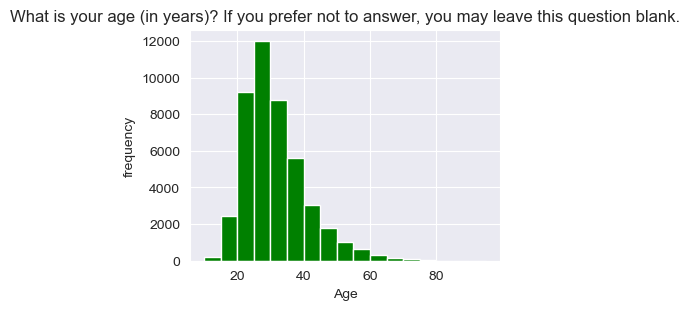

In [75]:
plt.figure(figsize=(4,3))
plt.hist(df4.Age, bins= np.arange(10,100,5), color ='g')
plt.title(df2.Age)
plt.ylabel('frequency')
plt.xlabel('Age')

It appears that the majority of programmers fall within the age range of 20-40 years, with fewer programmers between the ages of 40-60. This implies that the programming community is predominantly composed of young individuals who pursue programming as both a livelihood and a career.

In [77]:
df2.MainBranch                

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

In [80]:
df4.MainBranch.value_counts(normalize=True)                

I am a developer by profession                                                   0.735158
I am a student who is learning to code                                           0.124469
I am not primarily a developer, but I write code sometimes as part of my work    0.085755
I code primarily as a hobby                                                      0.036136
I used to be a developer by profession, but no longer am                         0.018482
Name: MainBranch, dtype: float64

<Axes: title={'center': 'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'}, xlabel='MainBranch'>

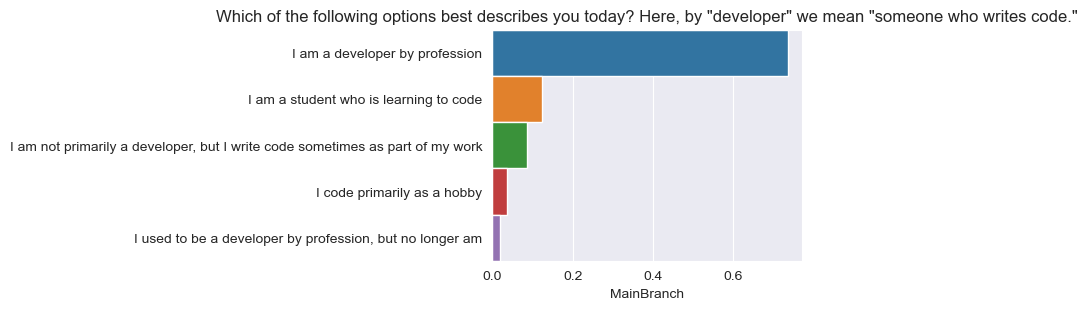

In [99]:
plt.figure(figsize=(4,3))
plt.title(df2.MainBranch)
sns.barplot(x=df4.MainBranch.value_counts(normalize=True) ,y=df4.MainBranch.value_counts(normalize=True).index, width=1)

##### 

From the respondents, it appears that more than 60% identify as developers by profession, while over 10% are students learning to code. Additionally, approximately 10% write code as part of their job but are not developers, and 5% code as a hobby.

In [93]:
df2.Hobbyist  

'Do you code as a hobby?'

In [97]:
df4.Hobbyist .value_counts() 

Yes    50271
No     13990
Name: Hobbyist, dtype: int64

([<matplotlib.patches.Wedge at 0x21f5c54d810>,
 [Text(-0.8525958948434683, 0.6950397399401461, 'Yes'),
  Text(0.8525959273806254, -0.6950397000272515, 'No')],
 [Text(-0.46505230627825533, 0.37911258542189785, '78.2%'),
  Text(0.4650523240257956, -0.37911256365122803, '21.8%')])

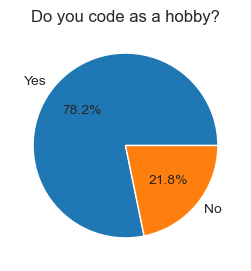

In [103]:
plt.figure(figsize=(4,3))
plt.title(df2.Hobbyist)
plt.pie(df4.Hobbyist .value_counts() , labels=df4.Hobbyist .value_counts().index, autopct= '%1.1f%%')


It appears that a larger proportion of people code as a hobby, as indicated by the diagram where approximately 78.2% of respondents stated they code as a hobby, while 21.8% may code for other reasons, such as livelihood or skill development. This suggests that coding is more commonly pursued as a hobby among programmers worldwide

<Axes: title={'center': 'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'}, ylabel='Frequency'>

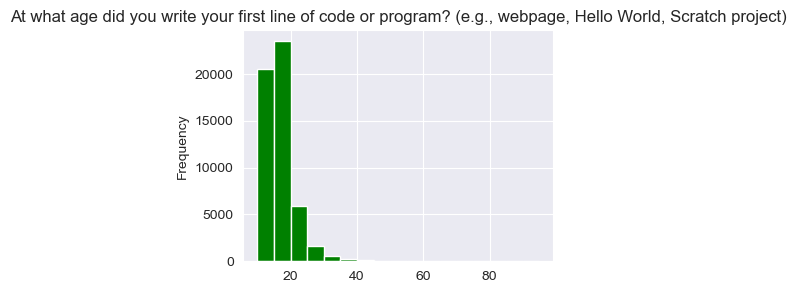

In [119]:
df4.Age1stCode=pd.to_numeric(df4.Age1stCode, errors='coerce')

plt.figure(figsize=(4,3))
plt.title(df2.Age1stCode)
df4.Age1stCode.plot(kind='hist', bins=np.arange(10,100,5), color ='g')

Approximately  above 80% of individuals appear to have started coding between the ages of 1-20, while less than 50% began coding between the ages of 20-40. This further underscores the notion that the majority of programmers worldwide are young individuals who view programming as a hobby

In [122]:
df4.CompFreq .value_counts()

Yearly     19764
Monthly    18809
Weekly      1349
Name: CompFreq, dtype: int64

([<matplotlib.patches.Wedge at 0x21f5fa92a50>,
 [Text(0.017052101264186846, 1.0998678219870222, 'Yearly'),
  Text(-0.13349582133070628, -1.0918694361906283, 'Monthly'),
  Text(1.0938076781289194, -0.11655369263229154, 'Weekly')],
 [Text(0.009301146144101914, 0.599927902902012, '49.5%'),
  Text(-0.0728159025440216, -0.5955651470130698, '47.1%'),
  Text(0.5966223698885014, -0.06357474143579538, '3.4%')])

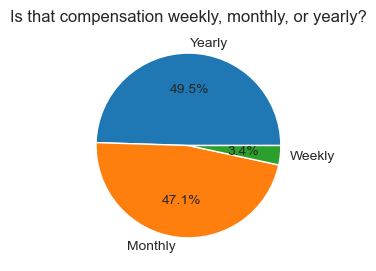

In [124]:
plt.figure(figsize=(4,3))
plt.title(df2.CompFreq)
plt.pie(df4.CompFreq .value_counts() , labels=df4.CompFreq .value_counts().index, autopct= '%1.1f%%')

A large percentage of respondents appear to receive their compensation yearly, comprising a total of 49.5% of this category. Additionally, 47.1% receive their compensation monthly, while 3.4% receive it weekly. This indicates that the majority of programmers worldwide receive their compensation yearly, as it remains the highest percentage in the dataset

<Axes: title={'center': 'Including any education, how many years have you been coding in total?'}, ylabel='Frequency'>

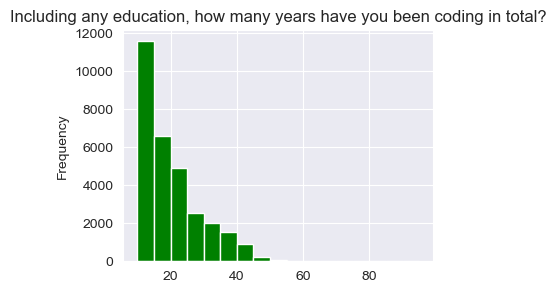

In [130]:
df4.YearsCode=pd.to_numeric(df4.YearsCode, errors='coerce')

plt.figure(figsize=(4,3))
plt.title(df2.YearsCode)
df4.YearsCode.plot(kind='hist', bins=np.arange(10,100,5), color ='g')

<Axes: title={'center': 'Where do you live?'}, xlabel='Country'>

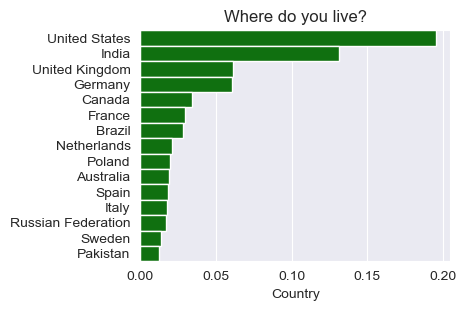

In [197]:
df4.Country.value_counts().head(15)
plt.figure(figsize=(4,3))
plt.title(df2.Country)
sns.barplot(x=df4.Country.value_counts(normalize=True).head(15) ,y=df4.Country.value_counts().head(15).index, width=1, color ='g')

It appears that approximately 20% of the programmers are from the USA, followed by Indian programmers, comprising more than 10% of the total. European programmers, particularly those from the United Kingdom, account for approximately 7% of the total. This suggests that the majority of programmers surveyed reside in the United States of America.

<Axes: title={'center': "Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."}, xlabel='CurrencyDesc'>

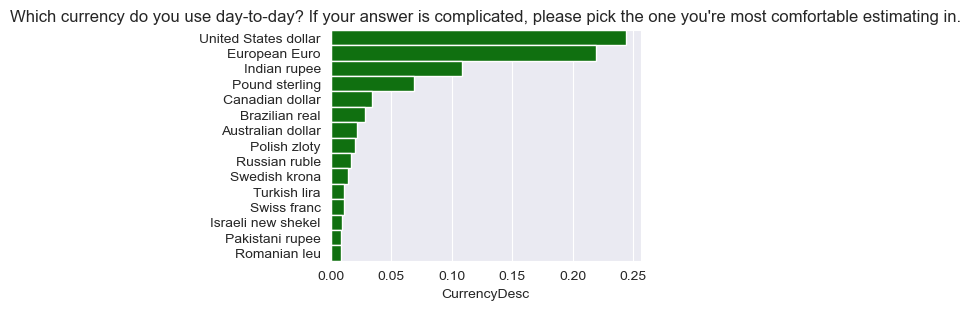

In [198]:
df4.CurrencyDesc .value_counts().head(15)
plt.figure(figsize=(4,3))
plt.title(df2.CurrencyDesc)
sns.barplot(x=df4.CurrencyDesc.value_counts(normalize=True).head(15) ,y=df4.CurrencyDesc.value_counts().head(15).index, width=1, color ='g')

<Axes: title={'center': "Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."}, xlabel='CurrencyDesc'>

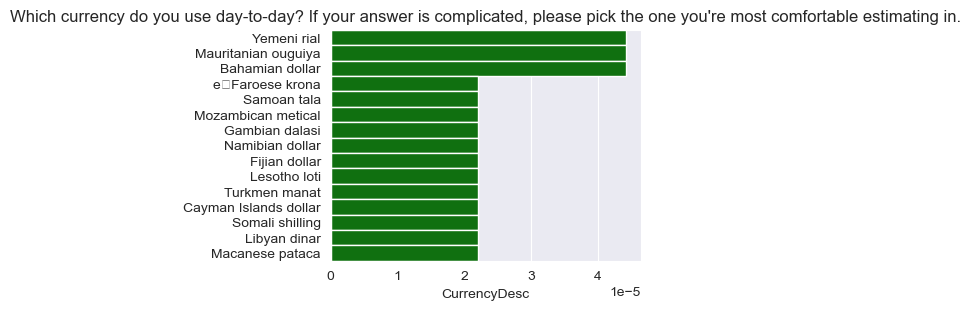

In [199]:
df4.CurrencyDesc .value_counts().tail(15)
plt.figure(figsize=(4,3))
plt.title(df2.CurrencyDesc)
sns.barplot(x=df4.CurrencyDesc.value_counts(normalize=True).tail(15) ,y=df4.CurrencyDesc.value_counts().tail(15).index, width=1, color ='g')


It appears that a larger proportion of programmers are paid in USD, accounting for 25% of the total currency used for payment. Conversely, the Yemeni rial is the least commonly used currency for payment. This suggests that a significant portion of salaries are paid in USD, followed by the euro, which occupies approximately 22% of the total currency used for payment

In [151]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ubiorukevwe/eda-stack-over-dataset" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/ubiorukevwe/eda-stack-over-dataset


'https://jovian.com/ubiorukevwe/eda-stack-over-dataset'

<Axes: title={'center': "Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."}, xlabel='CurrencySymbol'>

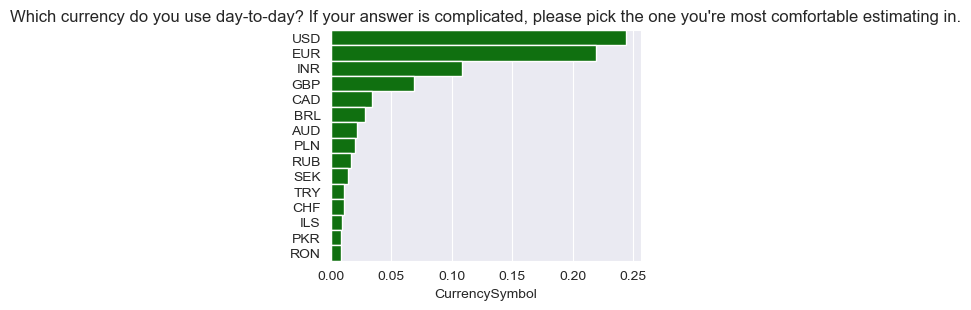

In [200]:
df4.CurrencySymbol.value_counts().head(15) 
df4.CurrencySymbol .value_counts().head(15)
plt.figure(figsize=(4,3))
plt.title(df2.CurrencySymbol)
sns.barplot(x=df4.CurrencySymbol.value_counts(normalize=True).head(15) ,y=df4.CurrencySymbol.value_counts().head(15).index, width=1, color ='g')

In [161]:
df4.DatabaseDesireNextYear.value_counts()

PostgreSQL                                                                        2308
Microsoft SQL Server                                                              1943
MySQL                                                                             1823
MongoDB                                                                           1620
SQLite                                                                             964
                                                                                  ... 
DynamoDB;Elasticsearch;Firebase;MongoDB;Oracle;PostgreSQL;Redis                      1
Cassandra;Microsoft SQL Server;MongoDB;PostgreSQL;SQLite                             1
Cassandra;DynamoDB;MariaDB;Microsoft SQL Server;MySQL;SQLite                         1
Couchbase;DynamoDB;Elasticsearch;MariaDB;MongoDB;MySQL;PostgreSQL;Redis;SQLite       1
Elasticsearch;IBM DB2;Oracle                                                         1
Name: DatabaseDesireNextYear, Length: 3189,

In [173]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [175]:
df_database = split_multicolumn(df4.DatabaseDesireNextYear)
df_database

,Microsoft SQL Server,MySQL,PostgreSQL,MongoDB,Firebase,Cassandra,Elasticsearch,MariaDB,Redis,SQLite,Oracle,DynamoDB,Couchbase,IBM DB2
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,True,True,True,False,False,True,False,False,False,False,True,False,False


<Axes: title={'center': 'Which database environments have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the database and want to continue to do so, please check both boxes in that row.)'}>

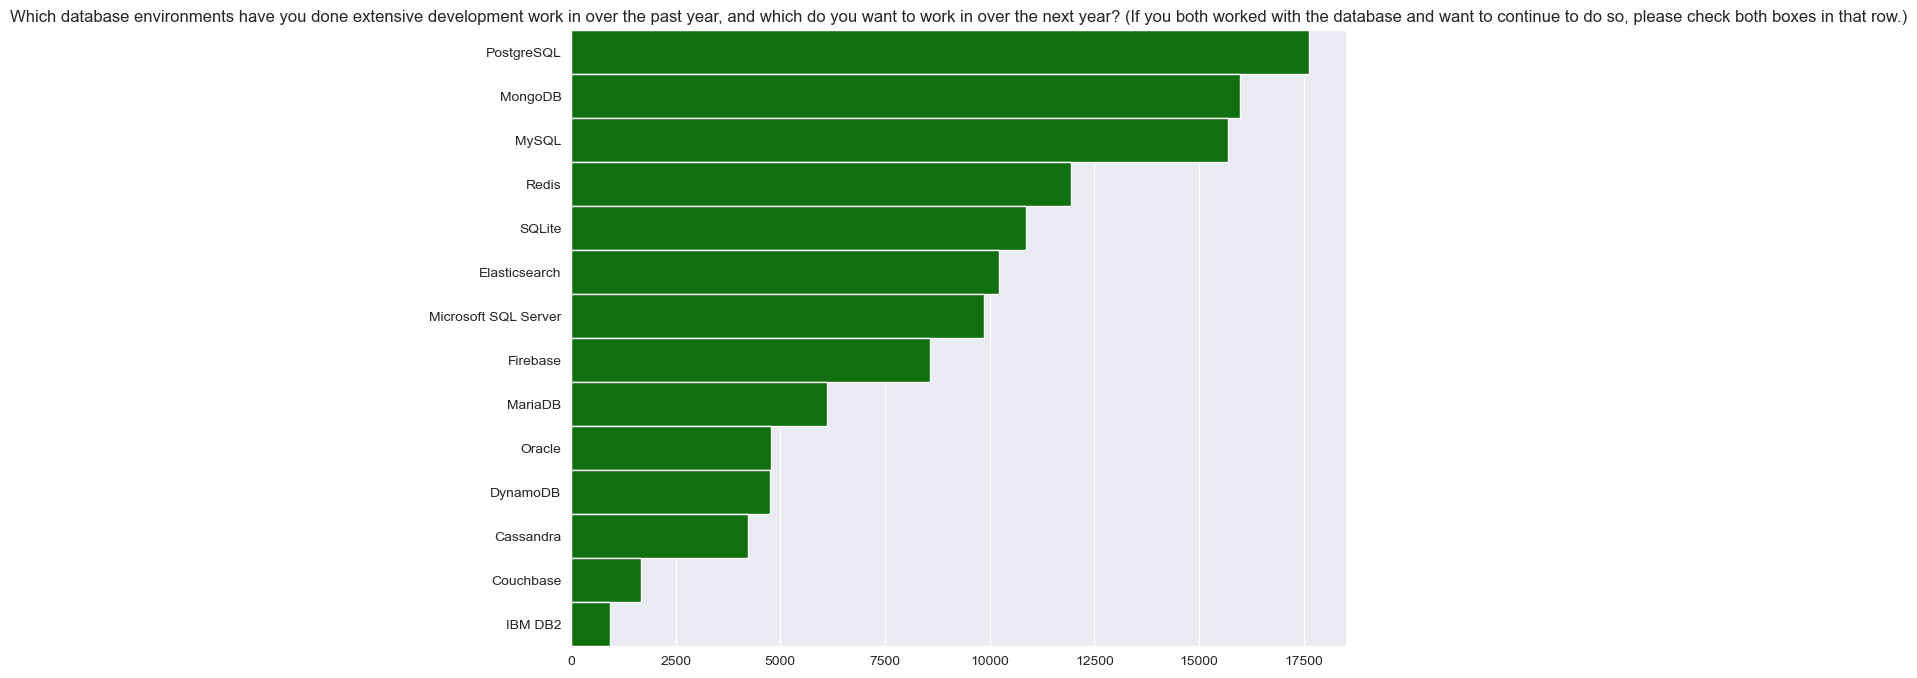

In [186]:
df_database.sum().sort_values(ascending =False)
plt.figure(figsize=(10,8))
plt.title(df2.DatabaseDesireNextYear)
sns.barplot(x=df_database.sum().sort_values(ascending =False) ,y=df_database.sum().sort_values(ascending =False).index, width=1, color ='g')

In [190]:
Databaswork = split_multicolumn(df4.DatabaseWorkedWith ) 

In [191]:
Databaswork 

,Elasticsearch,Microsoft SQL Server,Oracle,MySQL,PostgreSQL,Redis,SQLite,MariaDB,Firebase,MongoDB,IBM DB2,DynamoDB,Cassandra,Couchbase
0,True,True,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,False,True,False,False,False,False,False,False,False,False,False,False,False


<Axes: title={'center': 'Which database environments have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the database and want to continue to do so, please check both boxes in that row.)'}>

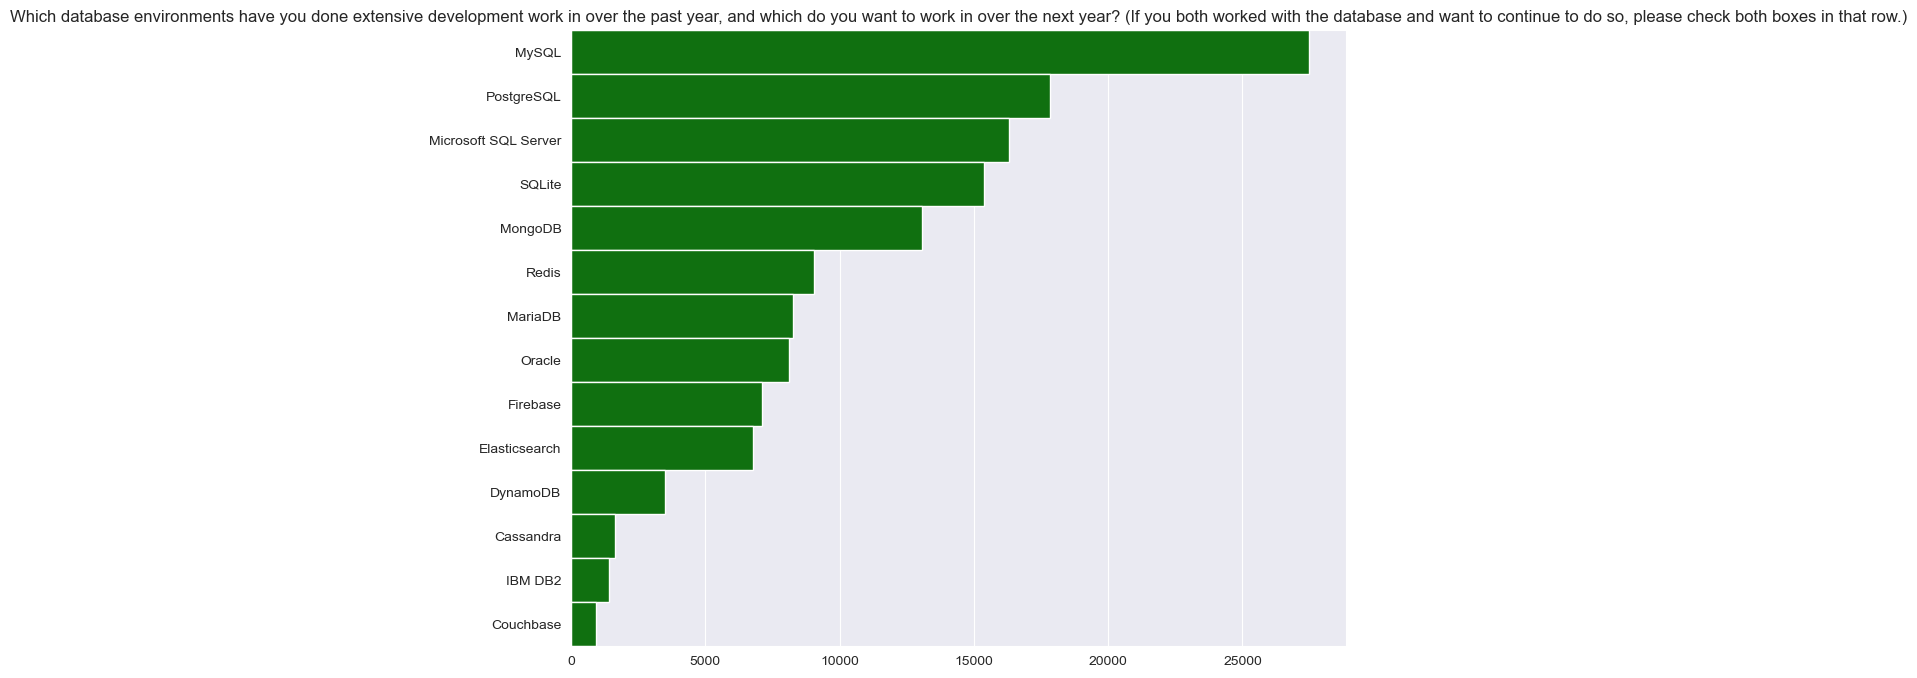

In [196]:
Databaswork.sum().sort_values(ascending =False)

plt.figure(figsize=(10,8))
plt.title(df2.DatabaseWorkedWith)
sns.barplot(x=Databaswork.sum().sort_values(ascending =False) ,y=Databaswork.sum().sort_values(ascending =False).index, width=1, color ='g')

It appears that MySQL tops the list of databases that most programmers have worked with and plan to continue working with in the next year, followed by PostgreSQL and then SQL Server. This indicates that MySQL is highly demanded, and there is a trend among programmers to move towards using MySQL databases

In [203]:
df4.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                        4416
Developer, back-end                                                                                                                                                                                                          3073
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                               2221
Developer, back-end;Developer, full-stack                                                                                                                                                                                    1473
Developer, front-end                                                                            

In [205]:
df_Devtyp = split_multicolumn(df4.DevType)

<Axes: title={'center': 'Which of the following describe you? Please select all that apply.'}>

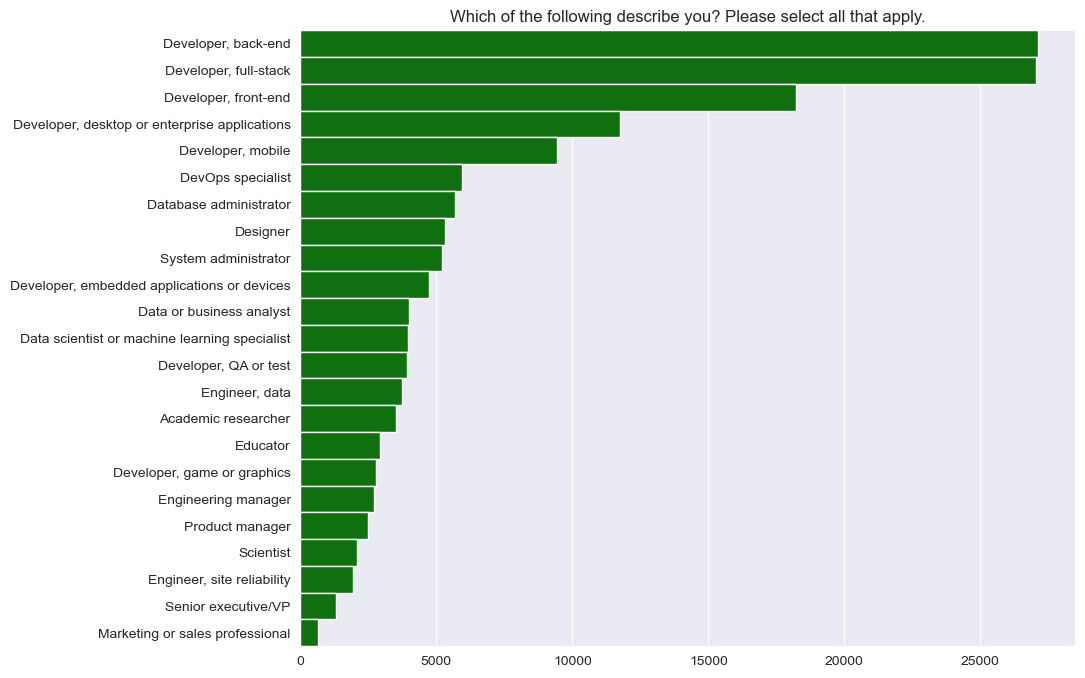

In [209]:
df_Devtyp .sum().sort_values(ascending =False)

plt.figure(figsize=(10,8))
plt.title(df2.DevType)
sns.barplot(x=df_Devtyp .sum().sort_values(ascending =False) ,y=df_Devtyp .sum().sort_values(ascending =False).index, width=1, color ='g')

It appears that most programmers identify as developers, with backend developers topping the list, followed by full-stack developers and then front-end developers. This suggests a high demand for developers worldwide, possibly due to the increasing prevalence of e-commerce and businesses creating websites. Conversely, marketing and sales personnel are among the least represented roles among programmers

<Axes: title={'center': 'Which of the following best describes the highest level of formal education that you’ve completed?'}, xlabel='EdLevel'>

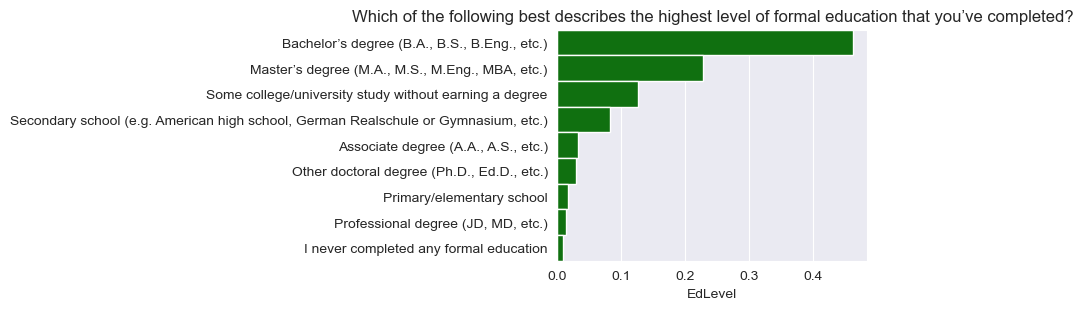

In [220]:
df4.EdLevel.value_counts(normalize=True) 
plt.figure(figsize=(4,3))
plt.title(df2.EdLevel)
sns.barplot(x=df4.EdLevel.value_counts(normalize=True),y=df4.EdLevel.value_counts(normalize=True).index, width=1, color ='g')


It appears that more than 40% of respondents have bachelor's degrees in fields other than computer science, while 22% have master's degrees in non-computer science fields. Additionally, over 10% respondents have attended university but did not earn a degree. This implies that the majority of programmers are educated, with at least a bachelor's degree as their level of education. However, it's important to note that lack of formal education does not preclude employment in the field.

<Axes: title={'center': 'Which of the following best describes your current employment status?'}, xlabel='Employment'>

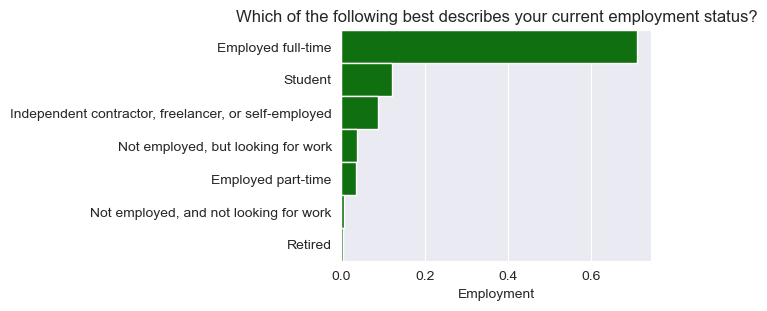

In [226]:
df4.Employment.value_counts(normalize= True)

plt.figure(figsize=(4,3))
plt.title(df2.Employment)
sns.barplot(x=df4.Employment.value_counts(normalize= True),y=df4.Employment.value_counts(normalize= True).index, width=1, color ='g')


It appears that more than 60% of programmers are employed full-time, with over 10% of the total, including students, also holding employment. Additionally, a large percentage are engaged in freelancing. This suggests that programmers are highly sought after, likely due to the increase in online businesses and advancements in technology. As the field continues to expand, it is anticipated that more individuals will be employed in programming roles

In [227]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ubiorukevwe/eda-stack-over-dataset" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/ubiorukevwe/eda-stack-over-dataset


'https://jovian.com/ubiorukevwe/eda-stack-over-dataset'

<Axes: title={'center': 'NOT including education, how many years have you coded professionally (as a part of your work)?'}, ylabel='Frequency'>

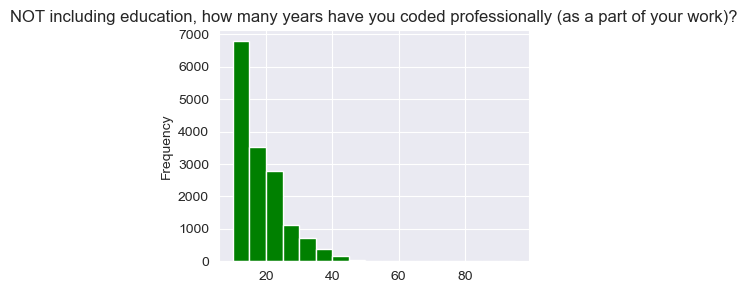

In [231]:
df4.YearsCodePro.value_counts() 
df4.YearsCodePro=pd.to_numeric(df4.YearsCodePro, errors='coerce')

plt.figure(figsize=(4,3))
plt.title(df2.YearsCodePro)
df4.YearsCodePro.plot(kind='hist', bins=np.arange(10,100,5), color ='g')

<Axes: title={'center': 'Compared to last year, how welcome do you feel on Stack Overflow?'}, xlabel='WelcomeChange'>

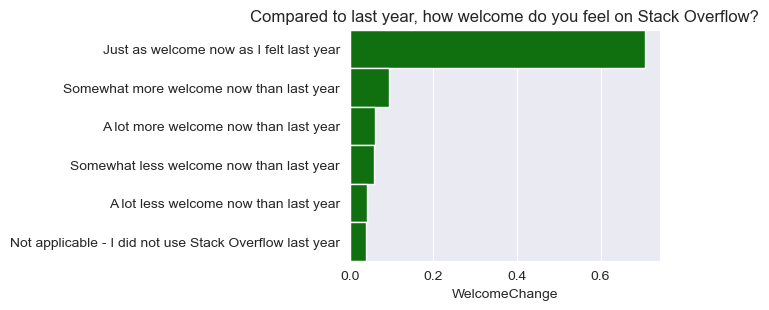

In [237]:
df4.WelcomeChange.value_counts(normalize=True)


plt.figure(figsize=(4,3))
plt.title(df2.WelcomeChange)
sns.barplot(x=df4.WelcomeChange.value_counts(normalize=True),y=df4.WelcomeChange.value_counts(normalize=True).index, width=1, color ='g')


<Axes: title={'center': 'On average, how many hours per week do you work? Please enter a whole number in the box.'}, xlabel='Hourwork', ylabel='Frequency'>

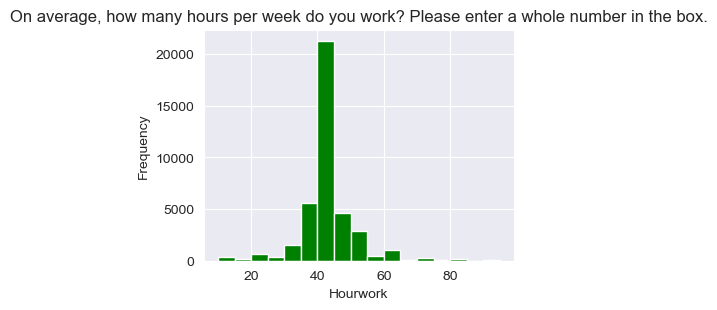

In [243]:
df4.WorkWeekHrs .value_counts()

df4.WorkWeekHrs=pd.to_numeric(df4.WorkWeekHrs, errors='coerce')

plt.figure(figsize=(4,3))
plt.title(df2.WorkWeekHrs)
plt.xlabel('Hourwork')
df4.WorkWeekHrs.plot(kind='hist', bins=np.arange(10,100,5), color ='g')

it appear that modt of the programmer work more than 45 hour per week

## Inferences and Conclusions

In conclusion, the analysis of the dataset reveals several key insights into the demographics, education, employment status, and  compensation preferences of programmers worldwide.

1.Firstly, it's evident that a significant portion of programmers are employed full-time, with more than 60% holding full-time positions. Additionally, over 10% of the respondents, including students, are also employed, indicating a high demand for programming skills in various industries. Freelancing is also prevalent among programmers, reflecting the flexibility and opportunities available in the field.

2.Education-wise, the majority of programmers possess at least a bachelor's degree, with more than 40% having degrees in fields other than computer science. This underscores the diverse educational backgrounds of individuals entering the programming profession.
Moreover, the analysis indicates a strong preference for certain programming languages, databases, and development roles. MySQL emerges as the most commonly used database, with backend development being the most prevalent role among programmers.
Looking ahead, the field of programming is expected to continue growing, driven by the increasing reliance on technology and the proliferation of online businesses. As a result, the demand for skilled programmers is likely to remain high, offering ample opportunities for employment and professional growth in the future.

3 majority of programmers reside in the United States, followed by India and European countries such as the United Kingdom. This geographical distribution reflects the global nature of the programming profession, with concentrations in regions known for their technological advancements and business opportunities.

4 Age-wise, it's observed that a significant portion of programmers are young, with most falling within the age range of 20-40 years. However, there is also representation from older age groups, indicating that programming attracts individuals from diverse age demographics.

5 In terms of compensation, the analysis reveals that a substantial proportion of programmers receive their compensation yearly, with USD being the most commonly used currency for payment. This preference for annual compensation may reflect stability and predictability in income among programmers, while the dominance of USD underscores the global influence of the United States in the tech industry.

## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html




In [247]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ubiorukevwe/eda-stack-over-dataset" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/ubiorukevwe/eda-stack-over-dataset


'https://jovian.com/ubiorukevwe/eda-stack-over-dataset'